In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [28]:
df=pd.read_csv("https://raw.githubusercontent.com/mrbarron3/stat451/main/loan_data.csv")
df=pd.read_csv("https://raw.githubusercontent.com/mrbarron3/stat451/main/loan_data.csv")
df=df.join(pd.get_dummies(df.purpose))
df=df.drop("purpose", axis=1)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']  

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

D=0:
                  model MSE_train MSE_test .intercept_ .coef_
0    LinearRegression()      0.14     0.13        0.16     []
0  Lasso(max_iter=2000)      0.14     0.13        0.16     []
0               Ridge()      0.14     0.13        0.16     []


/var/folders/mx/0390mkx11_7791twtj3vsx800000gn/T/ipykernel_45913/3670902653.py:44: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  plt.xlim(low, high)  # Adjust the x-axis limits based on your data range


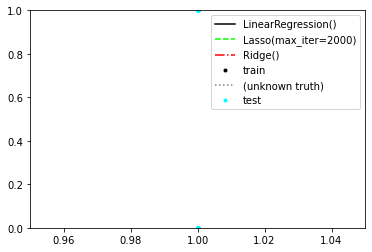

D=1:
                  model MSE_train MSE_test .intercept_ .coef_
0    LinearRegression()      0.14     0.13        0.16  [0.0]
0  Lasso(max_iter=2000)      0.14     0.13        0.16  [0.0]
0               Ridge()      0.14     0.13        0.16  [0.0]


/var/folders/mx/0390mkx11_7791twtj3vsx800000gn/T/ipykernel_45913/3670902653.py:44: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  plt.xlim(low, high)  # Adjust the x-axis limits based on your data range


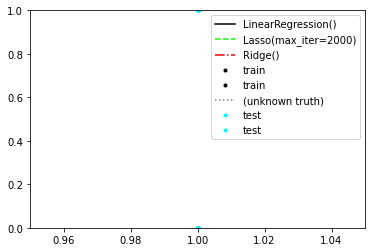

D=2:
                  model MSE_train MSE_test .intercept_  \
0    LinearRegression()      0.14     0.13        0.16   
0  Lasso(max_iter=2000)      0.14     0.13        0.16   
0               Ridge()      0.14     0.13        0.16   

                      .coef_  
0  [0.0, 0.0, 0.0, 0.0, 0.0]  
0  [0.0, 0.0, 0.0, 0.0, 0.0]  
0  [0.0, 0.0, 0.0, 0.0, 0.0]  


ValueError: X has 3 features, but LinearRegression is expecting 6 features as input.

In [38]:
low = X.min().min()
high = low = X.max().max()
N = len(df)
N_plot = 50
x_plot = np.linspace(start=low, stop=high, num=N_plot)

for D in range(N):
    polynomial = PolynomialFeatures(degree=D)
    X = polynomial.fit_transform(X)
    X_plot = polynomial.fit_transform(x_plot.reshape(N_plot, 1))

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    models = [linear_model.LinearRegression(),
              linear_model.Lasso(max_iter=2000),
              linear_model.Ridge()]

    df_results = pd.DataFrame(columns=['model', 'MSE_train', 'MSE_test', '.intercept_', '.coef_'])
    for model in models:
        model.fit(X_train, y_train)
        MSE_train = np.mean((y_train - model.predict(X_train))**2)
        MSE_test = np.mean((y_test - model.predict(X_test))**2)
        new_row = pd.DataFrame({'model': [str(model)], 'MSE_train': [MSE_train],
                                 'MSE_test': [MSE_test], '.intercept_': [model.intercept_],
                                 '.coef_': [np.round(model.coef_[1:], 2)]})
        df_results = pd.concat([df_results, new_row])

    pd.set_option('display.precision', 2)
    pd.set_option('display.max_colwidth', 100)
    print(f'D={D}:\n{df_results}')

    # make plot
    model_colors = ['black', 'lime', 'red']
    model_linestyles = ['solid', 'dashed', 'dashdot']
    for i in range(len(models)):
        model = models[i]
        y_plot = model.predict(X_plot)
        plt.plot(x_plot, y_plot, linestyle=model_linestyles[i], color=model_colors[i], label=str(model))

    plt.plot(X[y_train.index], y_train, linestyle='None', marker='.', color='black', label='train')
    plt.plot(x_plot, x_plot**2, linestyle='dotted', color='gray', label='(unknown truth)')
    plt.plot(X[y_test.index], y_test, linestyle='None', marker='.', color='aqua', label='test')
    plt.xlim(low, high)  # Adjust the x-axis limits based on your data range
    plt.ylim(np.min(y), np.max(y))  # Adjust the y-axis limits based on your data range
    plt.legend()
    plt.show(block=False)
